In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
df = pd.read_csv("Hydrants.csv")
df.head()

,the_geom,OBJECTID,BORO,UNITID,POINT_X,POINT_Y,CB,LATITUDE,LONGITUDE
0,POINT (-73.79456804377382 40.7722177771488),169,4,H425919a,1041150.586,220683.2730,407.0,40.772217,-73.794571
1,POINT (-73.91289250895464 40.644346617665086),170,3,H325449,1008423.396,174041.2450,318.0,40.644348,-73.912895
2,POINT (-73.95303997851815 40.72505714515931),172,3,H307276,997266.219,203437.9060,301.0,40.725056,-73.953041
3,POINT (-73.99463256503688 40.69398892775763),173,3,H301843,985738.421,192115.3730,302.0,40.693989,-73.994629
4,POINT (-73.93569187481359 40.73528872722263),174,4,H439410,1002071.970,207168.6435,402.0,40.735291,-73.935692


In [4]:
df.count()

the_geom     109615
OBJECTID     109615
BORO         109615
UNITID       109615
POINT_X      109615
POINT_Y      109615
CB           109603
LATITUDE     109615
LONGITUDE    109615
dtype: int64

In [6]:
manhattan = df[df['BORO'] == 1]
manhattan.head()

,the_geom,OBJECTID,BORO,UNITID,POINT_X,POINT_Y,CB,LATITUDE,LONGITUDE
13149,POINT (-73.909049678923 40.874261681246686),16321,1,H201246,1009402.856,257807.917,208.0,40.87426,-73.9090
36509,POINT (-73.90941836943684 40.87453100061599),44999,1,H201257,1009300.791,257905.935,208.0,40.87453,-73.9094
37305,POINT (-73.91093370530525 40.87792048130958),45972,1,H201754,1008880.462,259140.427,208.0,40.87792,-73.9109
56832,POINT (-73.90855985439175 40.87666452831641),70053,1,H201759,1009537.406,258683.510,208.0,40.87666,-73.9085
61451,POINT (-73.90889827782112 40.87388393586331),75721,1,H201247,1009444.870,257670.333,207.0,40.87388,-73.9088


In [7]:
manhattan.count()

the_geom     13190
OBJECTID     13190
BORO         13190
UNITID       13190
POINT_X      13190
POINT_Y      13190
CB           13190
LATITUDE     13190
LONGITUDE    13190
dtype: int64

In [8]:
pt = manhattan.the_geom
pt

13149       POINT (-73.909049678923 40.874261681246686)
36509      POINT (-73.90941836943684 40.87453100061599)
37305      POINT (-73.91093370530525 40.87792048130958)
56832      POINT (-73.90855985439175 40.87666452831641)
61451      POINT (-73.90889827782112 40.87388393586331)
                              ...                      
109592     POINT (-73.99798015130197 40.76163866020268)
109596     POINT (-73.99520364089209 40.76042573844972)
109597     POINT (-73.99756258955742 40.76226186590283)
109604       POINT (-73.9947729254417 40.7602596332204)
109610    POINT (-73.99743970522597 40.761407055586034)
Name: the_geom, Length: 13190, dtype: object

In [10]:
points = df.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)
points

/Users/minjungsim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


0                POINT (-73.79457092 40.7722168)
1         POINT (-73.91289519999999 40.64434814)
2         POINT (-73.95304108000001 40.72505569)
3                POINT (-73.99462891 40.6939888)
4               POINT (-73.93569183 40.73529053)
                           ...                  
109610    POINT (-73.99743970999999 40.76140706)
109611           POINT (-74.1746562 40.52428354)
109612    POINT (-73.90683325000001 40.88594388)
109613          POINT (-73.81470602 40.82531467)
109614          POINT (-73.92409803 40.84121664)
Length: 109615, dtype: object

In [11]:
manhattan_hydrant = gpd.GeoDataFrame(manhattan, geometry = points)
manhattan_hydrant.crs = {'init': 'epsg:4326'}
manhattan_hydrant.head()

/Users/minjungsim/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,the_geom,OBJECTID,BORO,UNITID,POINT_X,POINT_Y,CB,LATITUDE,LONGITUDE,geometry
13149,POINT (-73.909049678923 40.874261681246686),16321,1,H201246,1009402.856,257807.917,208.0,40.87426,-73.9090,POINT (-73.90900 40.87426)
36509,POINT (-73.90941836943684 40.87453100061599),44999,1,H201257,1009300.791,257905.935,208.0,40.87453,-73.9094,POINT (-73.90940 40.87453)
37305,POINT (-73.91093370530525 40.87792048130958),45972,1,H201754,1008880.462,259140.427,208.0,40.87792,-73.9109,POINT (-73.91090 40.87792)
56832,POINT (-73.90855985439175 40.87666452831641),70053,1,H201759,1009537.406,258683.510,208.0,40.87666,-73.9085,POINT (-73.90850 40.87666)
61451,POINT (-73.90889827782112 40.87388393586331),75721,1,H201247,1009444.870,257670.333,207.0,40.87388,-73.9088,POINT (-73.90880 40.87388)


<AxesSubplot:>

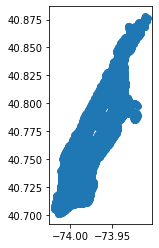

In [12]:
manhattan_hydrant.plot()

In [15]:
import csv
manhattan_hydrant.to_csv('manhattan_hydrants.csv')  
